https://www.hashscraper.com/

- 해시스크래퍼에 가입하셔서 대시보드를 확인  
- 다양한 크롤링 봇들이 있음  
- 이는 개발지식이 없는 비전공자도 쉽고 빠르게 데이터를 수집할 수 있음.  
- 사이트마다 다양한 봇이 있기 때문에 필요하신 사이트를 검색하여 활용

In [23]:
'''!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install wordcloud'''

'!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n!pip install wordcloud'

In [3]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# header 만들기
url = 'https://www.melon.com/chart/index.htm'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

In [6]:
# 헤더 확인
res =req.get(url, headers=header)
res
#파이선 객체 데이터로 변환
html = bs(res.text,'lxml')
#html

In [7]:
rank_list = []
singer_list = []
song_list = []


rank = html.find_all('span', attrs={'class':'rank'})
singer = html.select('.ellipsis.rank02 > span > a')
song = html.select('.ellipsis.rank01 > span > a')

for r in rank:
  rank_list.append(r.text)

for s in singer:
  singer_list.append(s.text)

for sg in song:
  song_list.append(sg.text)

print(len(song_list))
top_100={'순위':rank_list[:100], '가수':singer_list[:100], '곡명':song_list}
top_100_df=pd.DataFrame(top_100)
top_100_df

100


,순위,가수,곡명
0,순위,LE SSERAFIM (르세라핌),Perfect Night
1,1,EXO,첫 눈
2,2,aespa,Drama
3,3,태연 (TAEYEON),To. X
4,4,임영웅,사랑은 늘 도망가
...,...,...,...
95,95,Charlie Puth,Fact Check (불가사의; 不可思議)
96,96,김호중,Pixel world
97,97,NewJeans,크리스마스니까
98,98,폴킴,UNFORGIVEN (feat. Nile Rodgers)


In [8]:
from wordcloud import WordCloud

text = top_100_df['곡명']

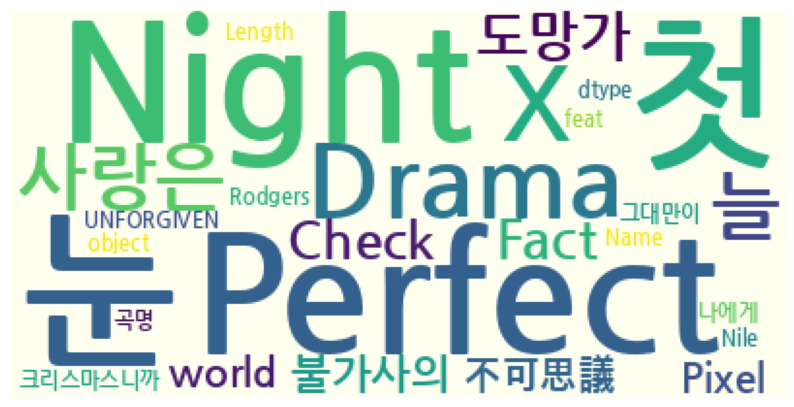

In [9]:
wordcloud=WordCloud(max_words=50,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',background_color='ivory').generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
text = open('hangul_text.txt').read()

In [11]:
#text

In [12]:
word_mask=np.array(Image.open('fan.jpg'))
#word_mask

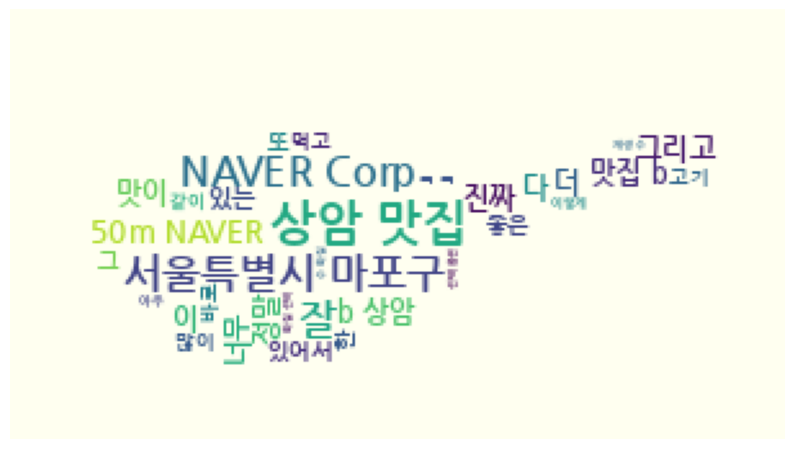

In [13]:
wordcloud=WordCloud(max_words=50,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',mask=word_mask,background_color='ivory').generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
wordcloud = WordCloud().generate(text)
wordcloud
wordcloud.words_

{'상암 맛집': 1.0,
 '서울특별시 마포구': 0.6941747572815534,
 '잘': 0.6650485436893204,
 'NAVER Corp': 0.6601941747572816,
 '50m NAVER': 0.6504854368932039,
 '진짜': 0.5485436893203883,
 '그리고': 0.5242718446601942,
 '너무': 0.5145631067961165,
 '더': 0.48058252427184467,
 '이': 0.46601941747572817,
 'b 상암': 0.46116504854368934,
 '정말': 0.44660194174757284,
 '맛집 b': 0.441747572815534,
 '맛이': 0.4223300970873786,
 '다': 0.3932038834951456,
 '있는': 0.3883495145631068,
 '있어서': 0.38349514563106796,
 '좋은': 0.36893203883495146,
 '그': 0.3640776699029126,
 '한': 0.34951456310679613,
 '또': 0.33980582524271846,
 '많이': 0.33980582524271846,
 'ㅋㅋ': 0.32524271844660196,
 '고기': 0.32038834951456313,
 '먹고': 0.32038834951456313,
 '바로': 0.3155339805825243,
 '같이': 0.3106796116504854,
 '이렇게': 0.3106796116504854,
 '아주': 0.3106796116504854,
 '재생 수': 0.2912621359223301,
 '수 화질': 0.2912621359223301,
 '화질 선택': 0.2912621359223301,
 '선택 옵션': 0.2912621359223301,
 '옵션 자동': 0.2912621359223301,
 '함께': 0.2815533980582524,
 'ㅎㅎ': 0.276699029126

In [15]:
words_counts = wordcloud.words_

# 값(value)을 기준으로 딕셔너리를 정렬
sorted_dict = list(sorted(words_counts.items(), key=lambda item: item[1], reverse=True))[:10]

print(sorted_dict)

[('상암 맛집', 1.0), ('서울특별시 마포구', 0.6941747572815534), ('잘', 0.6650485436893204), ('NAVER Corp', 0.6601941747572816), ('50m NAVER', 0.6504854368932039), ('진짜', 0.5485436893203883), ('그리고', 0.5242718446601942), ('너무', 0.5145631067961165), ('더', 0.48058252427184467), ('이', 0.46601941747572817)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50516 (\N{HANGUL SYLLABLE AM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47579 (\N{HANGUL SYLLABLE MAS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

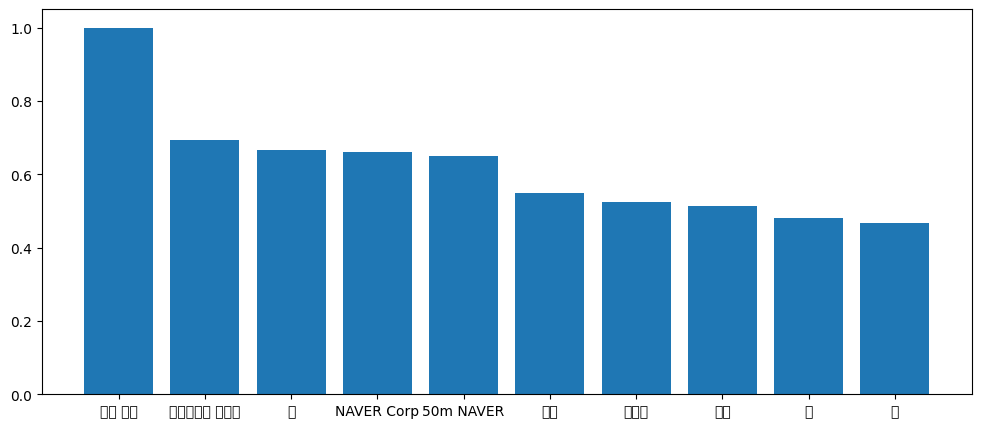

In [16]:
x_list = []
y_list = []

for i in sorted_dict:
  x_list.append(i[0])
  y_list.append(i[1])

plt.figure(figsize=(12,5))
plt.bar(x=x_list, height=y_list)
plt.show()

In [11]:
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
'''

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,631 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire